<a href="https://colab.research.google.com/github/tuanluvcats/lab_AI/blob/main/AI1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BÀI MẪU TENSORFLOW Classify images of clothing

In [1]:
import tensorflow as tf


import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.19.0


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images.shape

(60000, 28, 28)

In [7]:
len(train_labels)

60000

In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [9]:
test_images.shape

(10000, 28, 28)

In [10]:
len(test_labels)

10000

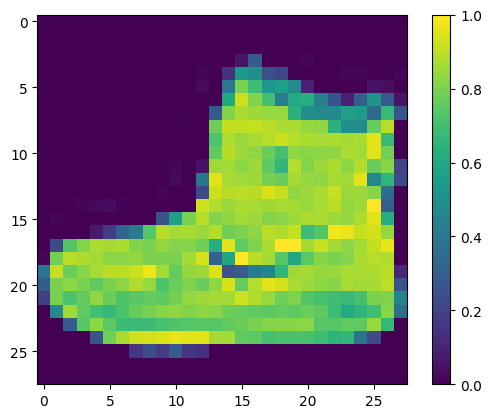

In [16]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [12]:
train_images = train_images / 255.0

test_images = test_images / 255.0

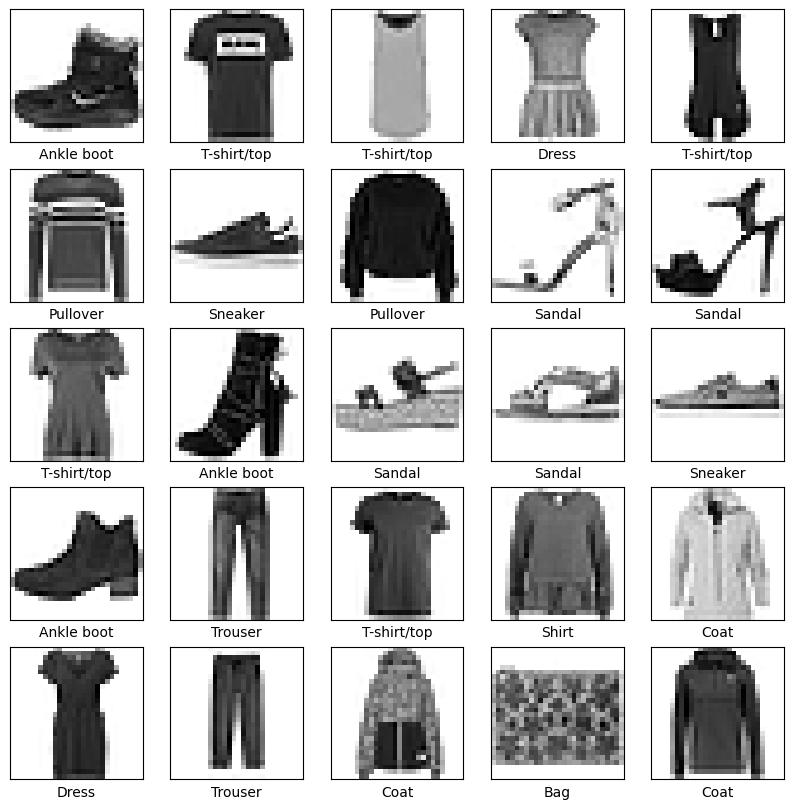

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [21]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [23]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7845 - loss: 0.6227
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8614 - loss: 0.3856
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8776 - loss: 0.3368
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8862 - loss: 0.3106
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8864 - loss: 0.3006
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8925 - loss: 0.2871
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9019 - loss: 0.2667
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9050 - loss: 0.2551
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9081 - loss: 0.2482
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9111 - loss: 0.2359


In [24]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.8806 - loss: 0.3312

Test accuracy: 0.8805999755859375


In [26]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step


In [27]:
predictions[0]

array([2.1834359e-07, 1.1319676e-09, 5.7679534e-07, 1.6934316e-09,
       1.8713215e-09, 2.6338373e-03, 2.4548390e-06, 9.2487121e-03,
       4.8756300e-07, 9.8811358e-01], dtype=float32)

In [28]:
np.argmax(predictions[0])

np.int64(9)

In [29]:
test_labels[0]

np.uint8(9)

In [30]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

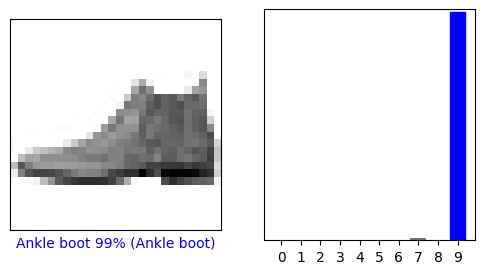

In [34]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

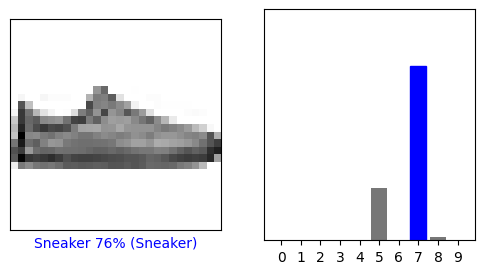

In [41]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

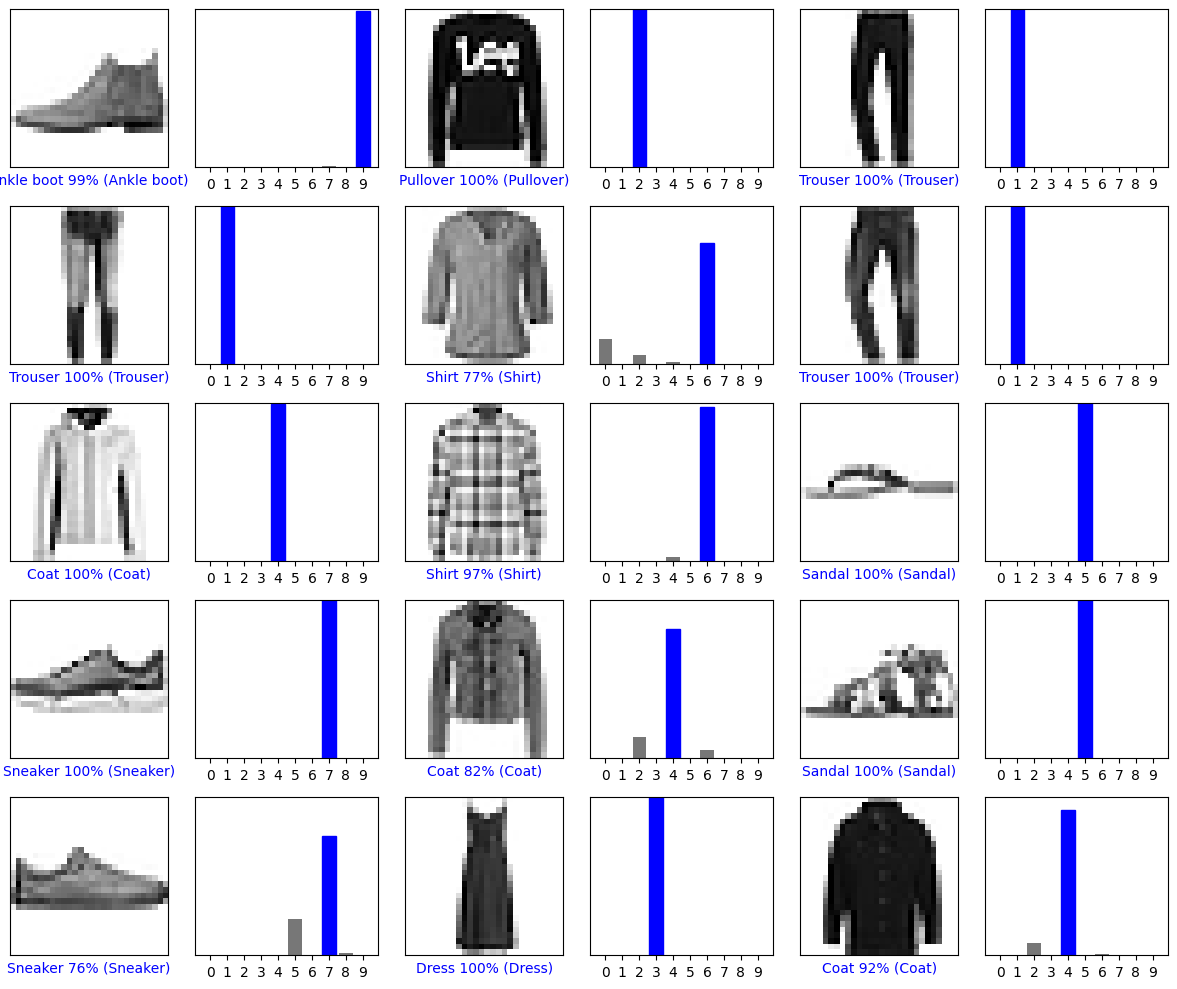

In [42]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [43]:
img = test_images[1]

print(img.shape)

(28, 28)


In [44]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [45]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[[3.19759238e-06 2.44366684e-14 9.97704208e-01 3.82160558e-13
  2.14839936e-03 1.03346854e-19 1.44284117e-04 1.67730240e-23
  4.13393653e-10 7.53098052e-16]]


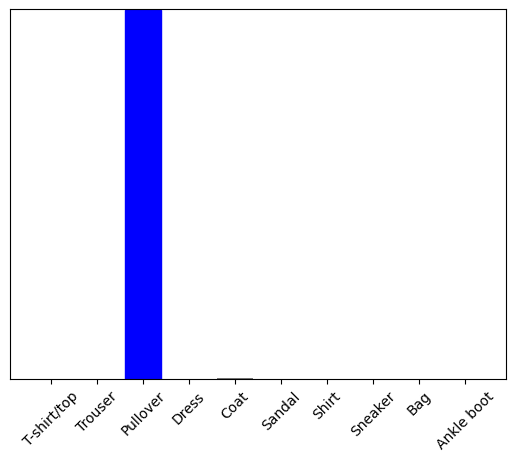

In [46]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [47]:
np.argmax(predictions_single[0])

np.int64(2)

#Bài tập trên lớp

In [51]:
a = (int)(input("Nhập vào a: "))
b = (int)(input("Nhập vào b: "))

print("Tổng: ", a + b)
print("Hiệu: ", a - b)
print("Tích: ", a * b)
print("Thương: ", a // b)

Nhập vào a: 25
Nhập vào b: 5
Tổng:  30
Hiệu:  20
Tích:  125
Thương:  5


In [56]:
string = "Hello World"
print(string[2:5])

llo


In [61]:
string = "  Hello World  "

string = string.replace(" ", "")
print(string)
string = string.lower()
print(string)
string = string.upper()
print(string)
string = string.replace("H", "J")
print(string)

HelloWorld
helloworld
HELLOWORLD
JELLOWORLD


In [64]:
a = (int)(input("Nhập vào a: "))
b = (int)(input("Nhập vào b: "))

if (a > b):
  print("Hello World!")

Nhập vào a: 5
Nhập vào b: 2
Hello World!


In [65]:
a = (int)(input("Nhập vào a: "))
b = (int)(input("Nhập vào b: "))

if (a == b):
  print("yes")
else:
  print("no")

Nhập vào a: 5
Nhập vào b: 5
yes


In [66]:
a = (int)(input("Nhập vào a: "))
b = (int)(input("Nhập vào b: "))

if (a == b):
  print("1")
elif (a > b):
  print("2")
else:
  print("3")


Nhập vào a: 2
Nhập vào b: 5
3


In [68]:
a = (int)(input("Nhập vào a: "))
b = (int)(input("Nhập vào b: "))
d = (int)(input("Nhập vào d: "))

if (a == b and b == d):
  print("Hello World!")




Nhập vào a: 2
Nhập vào b: 2
Nhập vào d: 2
Hello World!


In [69]:
a = (int)(input("Nhập vào a: "))
b = (int)(input("Nhập vào b: "))
c = (int)(input("Nhập vào c: "))
d = (int)(input("Nhập vào d: "))

if (a == b or c == d):
  print("Hello World!")

Nhập vào a: 2
Nhập vào b: 3
Nhập vào c: 5
Nhập vào d: 5
Hello World!


In [70]:
print("yes") if a > b else print("no")

no


In [71]:
a = (int)(input("Nhập vào a: "))
b = (int)(input("Nhập vào b: "))

print("A") if a > b else print("=") if a == b else print("B")

Nhập vào a: 5
Nhập vào b: 5
=


In [80]:
import numpy as np

n = 10
a = np.arange(0, n)

print("Mảng a:", a)

b = a[a % 2 == 0]

print("Mảng b:", b)

Mảng a: [0 1 2 3 4 5 6 7 8 9]
Mảng b: [0 2 4 6 8]


In [82]:
n = 1000
result = 0

for i in range(0,n):
  if i % 3 == 0 or i % 5 == 0:
    result = result + i

print(result)

233168


In [88]:
a = [3, 9, 1, 4]
b = [2, 7, 4, 3, 2, 8]

min = len(b) if len(a) > len(b) else len(a)
c = a if len(a) > len(b) else b

for i in range(min):
  c[i] = a[i] + b[i]
print(c)


[5, 16, 5, 7, 2, 8]


In [123]:
m = 5
n = 3

'''a'''
a = np.random.randint(0, 25, size=(m, n))
print(a)

'''b'''
k = (int) (input("\nNhập dòng muốn xuất: "))
print(a[k])

'''c'''
j = (int) (input("\nNhập cột muốn xuất: "))
print(a[:, j])

'''d'''
row_sums = np.sum(a, axis=1)
max_row_sum = np.max(row_sums)
max_row_index = np.argmax(row_sums)

print("\nTổng của mỗi dòng:", row_sums)
print("Dòng có tổng > 45 và là lớn nhất:", a[max_row_index], "=",  max_row_sum)

if max_row_sum > 45:
  print("")
else:
  print("\nKhông có dòng nào có tổng lớn hơn 45.")

'''e'''
col_prd = np.prod(a, axis=0)
min_col_prd = np.min(col_prd)
min_col_index = np.argmin(col_prd)

print("\nTích của mỗi cột:", col_prd)
print("Cột có tích nhỏ nhất:", a[:, min_col_index], "=",min_col_prd)

'''f'''
even_rows = a[::2]
odd_cols = even_rows[:, 1::2]

print("\nCác phần tử thuộc dòng chẵn và cột lẻ:")
print(odd_cols)


'''g'''
odd_cols = a[:, 1::2]
even_val = odd_cols[odd_cols % 2 ==0]
odd_cols_sum = np.sum(even_val)
avr_cols = np.mean(even_val, axis=0)
print("\nTổng các phần tử thuộc cột lẻ:", odd_cols_sum)
print("Trung bình các phần tử thuộc cột lẻ:", avr_cols)

'''h'''
sum = 0
count = 0
for i in range(m):
  for j in range(n):
    if(i == 0 or j == 0 or i == m-1 or j ==n-1):
      sum = sum + a[i][j]
      count = count +1

print("\nTrung bình cộng biên:", sum/count)

'''i'''
prod = 1
count = 0
for i in range(m):
  for j in range(n):
    if(i != 0 and j != 0 and i != m-1 and j !=n-1):
      prod = prod * a[i][j]
      count = count +1

result = prod **(1/count)
print("\nTrung bình tích khác biên:", result)


[[ 4 14 10]
 [ 8 10 17]
 [12  8 23]
 [ 4  8  9]
 [12 23 21]]

Nhập dòng muốn xuất: 2
[12  8 23]

Nhập cột muốn xuất: 2
[10 17 23  9 21]

Tổng của mỗi dòng: [28 35 43 21 56]
Dòng có tổng > 45 và là lớn nhất: [12 23 21] = 56


Tích của mỗi cột: [ 18432 206080 738990]
Cột có tích nhỏ nhất: [ 4  8 12  4 12] = 18432

Các phần tử thuộc dòng chẵn và cột lẻ:
[[14]
 [ 8]
 [23]]

Tổng các phần tử thuộc cột lẻ: 40
Trung bình các phần tử thuộc cột lẻ: 10.0

Trung bình cộng biên: 13.083333333333334

Trung bình tích khác biên: 8.617738760127533
